In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


 + Create a random forest on the income dataset
 + Separate data into training and testing set
  + Fine-tune max_depth, n_estimators (and criterion if you wish) 
    + On the training set
  + Display a confusion matrix of the best estimator
    + On the testing set

In [2]:
income_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, sep=", ")
income_data.head()

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
features = pd.get_dummies(income_data.iloc[:,:-1])
labels = income_data.iloc[:,14]

In [4]:
forest = RandomForestClassifier()
features_train, features_test, labels_train, labels_test = train_test_split(features, labels)
features_train.shape

(24420, 108)

In [5]:
#params = {"criterion": ["gini", "entropy"], "n_estimators": [2, 5, 10, 25], "max_depth": [None, 2, 3, 5]}
params = {"n_estimators": [2, 5, 10], "max_depth": [None, 2, 3]}
search = GridSearchCV(forest, params)
search.fit(features_train, labels_train)
predicted = search.best_estimator_.predict(features_test)
confusion_matrix(labels_test, predicted)

array([[5738,  450],
       [ 816, 1137]])

In [6]:
search.best_params_

{'max_depth': None, 'n_estimators': 10}

10 trees with whatever depth value is the best combination

### AdaBoost

In [13]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth = 1)

# Single tree
tree.fit(features_train, labels_train) 
train_pred = accuracy_score(labels_train, tree.predict(features_train))
test_pred = accuracy_score(labels_test, tree.predict(features_test))
print("Decision tree train/test accuracies: %.3f/%.3f" % (train_pred, test_pred))

Decision tree train/test accuracies: 0.759/0.760


We have overfitting (need to plot to see)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

# Boosted tree
tree = DecisionTreeClassifier(max_depth = 1)
ada = AdaBoostClassifier(base_estimator = tree, 
  n_estimators = 100, learning_rate = 0.1)
ada.fit(features_train, labels_train) 
train_pred = accuracy_score(labels_train, ada.predict(features_train))
test_pred = accuracy_score(labels_test, ada.predict(features_test))
print(
  "AdaBoost tree train/test accuracies: %.3f/%.3f" %
  (train_pred, test_pred))

AdaBoost tree train/test accuracies: 0.854/0.855


It shows improvement and looks more stable (need additional check for overfitting)

### Support Vector Machines

In [19]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
iris_data_std = iris.data
iris_data_std = (iris_data_std - iris_data_std.mean()) / iris_data_std.max() - iris_data_std.min()

features_train, features_test, labels_train, labels_test = train_test_split(iris_data_std, iris.target)

svm = SVC(kernel = "linear", C = 1)
svm.fit(features_train, labels_train) #training
svm.score(features_test, labels_test)

0.86842105263157898

We have very good accuracy 

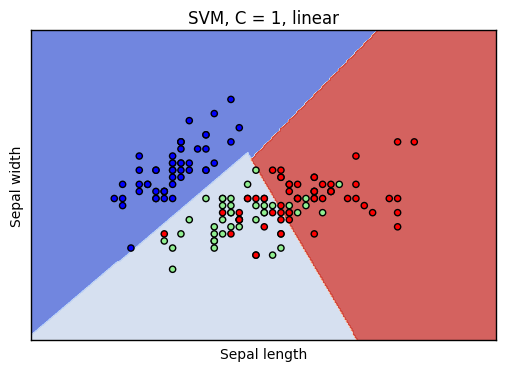

In [21]:
X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
step_size = 0.02
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

svm = SVC(kernel = "linear", C = 1).fit(X,y)
titles = ["SVM, C = 1, linear", "Max depth = 4"]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

for i, classifier in enumerate((svm, )):
  plt.figure()
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])
plt.show()

Applying the same for the standardized data

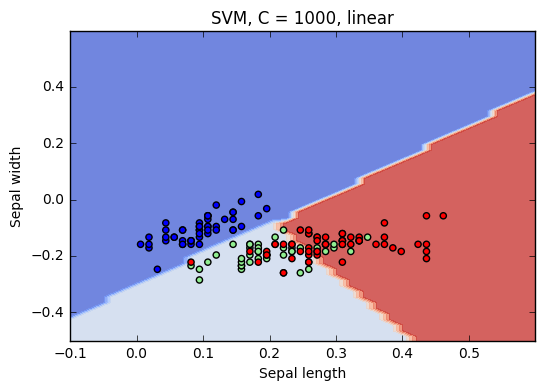

In [33]:
X = iris_data_std[:, :2] # Sepal length, sepal width
y = iris.target
step_size = 0.02
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

svm = SVC(kernel = "linear", C = 1000).fit(X,y)  #check with bigger regularization
titles = ["SVM, C = 1000, linear", "Max depth = 4"]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

for i, classifier in enumerate((svm, )):
  plt.figure()
  Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
  plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")
  plt.xlim(-0.1, 0.6)
  plt.ylim(-0.5, 0.6)
  #plt.xticks(())
  #plt.yticks(())
  plt.title(titles[i])
plt.show()

### Kernel SVM on Simulated Data

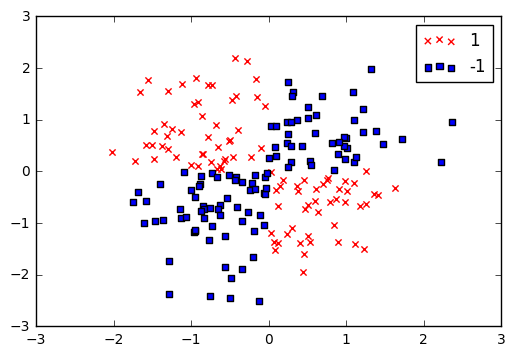

In [34]:
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
  c = "r", marker = "x", label = "1")
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
  c = "b", marker = "s", label = "-1")
plt.ylim([-3, 3])
plt.legend()
plt.show() 

svm = SVC(kernel = "rbf", C = 10, gamma = 0.1)

In [35]:
svm = SVC(kernel = "rbf", C = 1)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

iris_X = iris.data
iris_y = iris.target


#Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))

iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]

NameError: name 'iris' is not defined

In [2]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(iris.data, iris.target) #Fit the model using iris.data as training data and iris.target as target values

NameError: name 'KNeighborsClassifier' is not defined

In [1]:
knn.predict(iris_X_test)

NameError: name 'knn' is not defined

In [ ]:
iris_y_test